**1. Import Libraries**

In [14]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

**2. Upload Image**

In [15]:
uploaded = files.upload()  # Opens file picker

# Get the uploaded file
for fn in uploaded.keys():
    file_name = fn

# Open image using PIL and convert to OpenCV format
pil_image = Image.open(file_name).convert("RGB")
img = np.array(pil_image)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)  # OpenCV uses BGR

# Convert to grayscale for comparison and processing
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# -------------------------------
# Helper function to plot histogram
# -------------------------------
def plot_histogram(image, title):
    plt.figure()
    plt.hist(image.ravel(), 256, [0,256])
    plt.title(title)
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()


Saving 9830f48aaf9779c18f35b66caa107eea.jpg to 9830f48aaf9779c18f35b66caa107eea (2).jpg


**3. Global Histogram Equalization**

In [16]:
equalized_gray = cv2.equalizeHist(gray)

# For color image: equalize luminance channel in YUV
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])  # Equalize Y channel
equalized_color = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)

**4. CLAHE (Adaptive Histogram Equalization)**

In [17]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_gray = clahe.apply(gray)

# Color image (apply CLAHE to Y channel in YUV)
img_yuv_clahe = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
clahe_color = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img_yuv_clahe[:,:,0] = clahe_color.apply(img_yuv_clahe[:,:,0])
clahe_color_img = cv2.cvtColor(img_yuv_clahe, cv2.COLOR_YUV2RGB)

**5. Linear Contrast Adjustment**

In [18]:
alpha = 1.5  # Contrast factor
beta = 20    # Brightness adjustment
linear_gray = cv2.convertScaleAbs(gray, alpha=alpha, beta=beta)

# For color image, adjust each channel
linear_color = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
linear_color_rgb = cv2.cvtColor(linear_color, cv2.COLOR_BGR2RGB)

**6. Display Images**

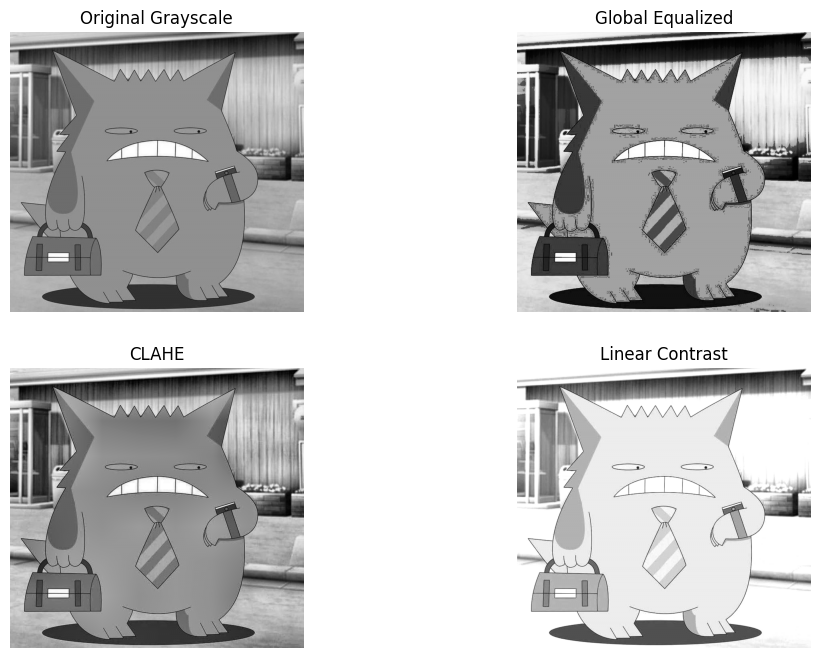

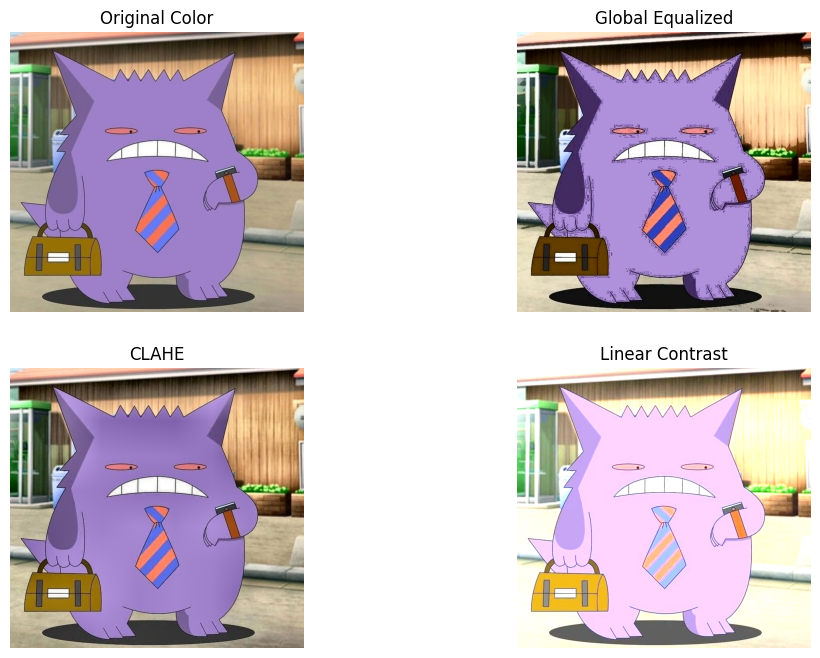

/tmp/ipython-input-623744958.py:20: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(image.ravel(), 256, [0,256])


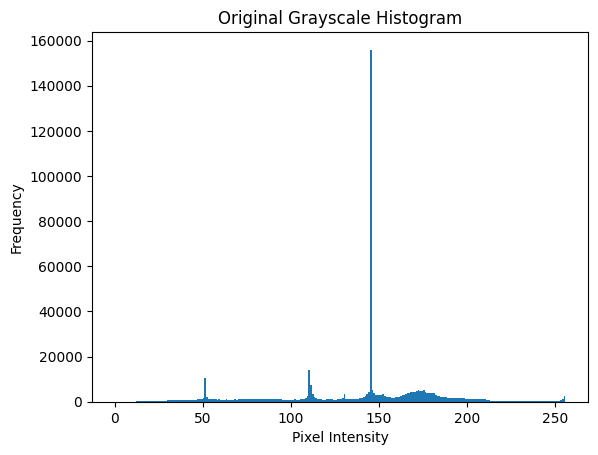

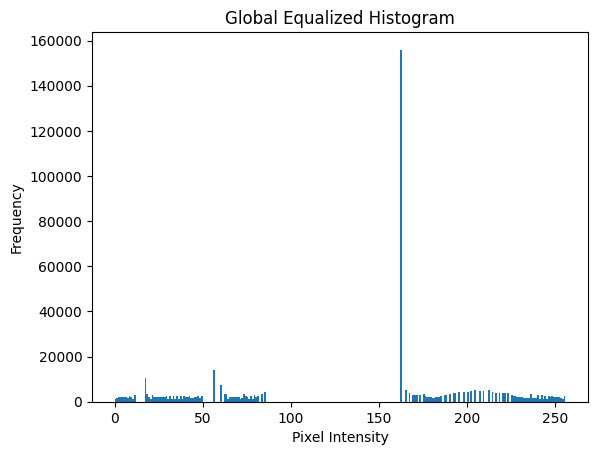

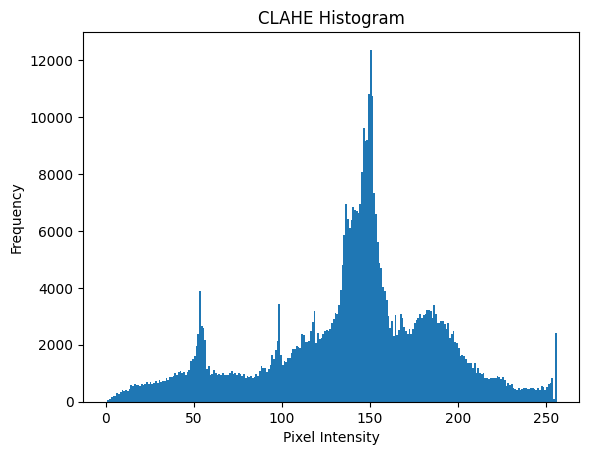

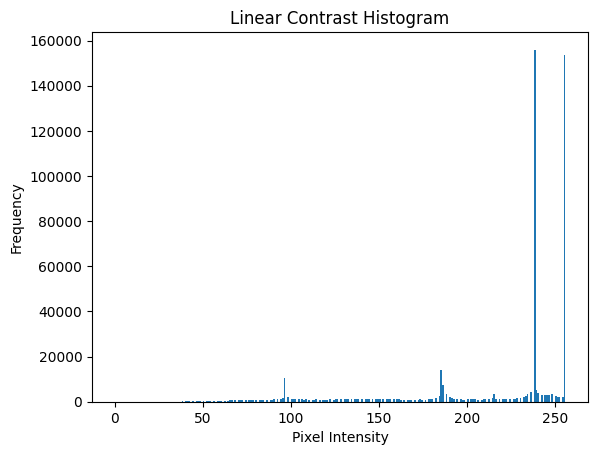

In [19]:
titles_gray = ["Original Grayscale", "Global Equalized", "CLAHE", "Linear Contrast"]
images_gray = [gray, equalized_gray, clahe_gray, linear_gray]

plt.figure(figsize=(12,8))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images_gray[i], cmap="gray")
    plt.title(titles_gray[i])
    plt.axis("off")
plt.show()

titles_color = ["Original Color", "Global Equalized", "CLAHE", "Linear Contrast"]
images_color = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB), equalized_color, clahe_color_img, linear_color_rgb]

plt.figure(figsize=(12,8))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images_color[i])
    plt.title(titles_color[i])
    plt.axis("off")
plt.show()

# -------------------------------
# Part 6: Display Histograms
# -------------------------------
plot_histogram(gray, "Original Grayscale Histogram")
plot_histogram(equalized_gray, "Global Equalized Histogram")
plot_histogram(clahe_gray, "CLAHE Histogram")
plot_histogram(linear_gray, "Linear Contrast Histogram")